# 2021-01-20_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476_rep1

Brief experiment description:

* 1:150 1.5 hours, 1:750 5 hours, 100 into 200 uL PBS for cyt.
* Testing relative levels of RPU construct in each landing pad
* All strains are sequence confirmed

Notes on experiment:

* Only testing plasmid version since landing pad versions already tested
* FITC-A is the output channel (YFP)

### Strains

#### Experiment
| strain number | parent strain | Description               | 
|---------------|---------------|-------------------------------|
| AJT476  | EcN | PJ23101-YFP on p15a backbone     |  


### Protocol

 - Overnight in M9 + kan
 - M9
     * Dilute 1:150 in 500 uL deep-well plate, grow for 1.5 hours
     * Dilute 1:750 into 500 uL in deep-well plate, grow for 5 hours
         - cells were a little dilute at end
     * 100 uL culture into 200 uL PBS + kan

In [1]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

# Set the default sans-serif font to Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Set to always use sans-serif fonts
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D

# Dan's custom scripts that aid in importing from conditions.csv file
sys.path.append('/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules')
import cf_imports
import cf_helpers

In [3]:
# Import reloads for when modules are being changed
import importlib
importlib.reload(cf_imports)
importlib.reload(cf_helpers)

<module 'cf_helpers' from '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules/cf_helpers.py'>

## Data Import

In [4]:
# Provide full path to flow cytometry .fcs file directory and pass to fixer
fcs_dir = cf_imports.dir_fix(
    r'/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/2021-01-20_EcN_LPs_RelativeExpression_M9_300min_plasmid_rep1/2021-01-20_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476')
# Optional specification of conditions directory (default to same directory as data)
conds_dir = None



In [5]:
# Create experiment from fcs files and conditions file ()
exp = cf_imports.exp_from_dirs(fcs_dir, conds_dir)

['/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-20_EcN_LPs_RelativeExpression_M9_300min_plasmid_rep1/2021-01-20_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476/Specimen_001_A4_A04.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-20_EcN_LPs_RelativeExpression_M9_300min_plasmid_rep1/2021-01-20_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476/Specimen_001_A5_A05.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-20_EcN_LPs_RelativeExpression_M9_300min_plasmid_rep1/2021-01-20_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476/Specimen_001_B4_B04.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-20_EcN_LPs_RelativeExpression_M9_300min_plasmid_rep1/2021-01-20_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476/Specimen_001_B5_B05.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-20_EcN_LPs_RelativeExpressio

In [6]:
# Check dataframe 
exp.data.head(10)
# exp2.data.head(10)
# exp3.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num
0,5220.089844,4839.0,10227.339844,9530.0,-5.920000,40.0,10.200000,24.0,23453.669922,21219.0,51.299999,4,0.0,M9,EcN,1,A,1,AJT476-1
1,5279.609863,4953.0,11470.010742,10005.0,1.480000,37.0,-10.200000,33.0,34054.742188,31385.0,51.299999,4,0.0,M9,EcN,1,A,1,AJT476-1
2,4756.950195,4534.0,9174.270508,7615.0,-14.800000,29.0,9.180000,57.0,34449.992188,31851.0,51.400002,4,0.0,M9,EcN,1,A,1,AJT476-1
3,5865.510254,5587.0,10355.320312,8622.0,-13.320000,28.0,35.700001,33.0,31405.169922,28826.0,51.400002,4,0.0,M9,EcN,1,A,1,AJT476-1
4,-33.480000,23.0,763.929993,1850.0,-11.840000,24.0,68.339996,60.0,4026.900146,3335.0,51.500000,4,0.0,M9,EcN,1,A,1,AJT476-1
5,4480.740234,4155.0,11912.410156,10327.0,3.700000,23.0,29.580000,39.0,36744.300781,33295.0,51.500000,4,0.0,M9,EcN,1,A,1,AJT476-1
6,3209.429932,3130.0,7798.090332,7526.0,-51.060001,4.0,28.559999,52.0,20616.240234,19254.0,51.500000,4,0.0,M9,EcN,1,A,1,AJT476-1
7,7515.330078,6921.0,8484.600586,7429.0,-21.460001,21.0,86.699997,33.0,36819.628906,33369.0,51.599998,4,0.0,M9,EcN,1,A,1,AJT476-1
8,6654.149902,6330.0,9946.890625,9750.0,-1.480000,36.0,-44.879997,24.0,32098.951172,29314.0,51.599998,4,0.0,M9,EcN,1,A,1,AJT476-1
9,5643.240234,5055.0,15658.590820,14995.0,-7.400000,19.0,-2.040000,35.0,30006.451172,27323.0,51.700001,4,0.0,M9,EcN,1,A,1,AJT476-1


In [7]:
exp.data.groupby(['parent_strain','strain_num', 'iptg']).size()
# exp2.data.groupby(['parent_strain','strain_num', 'iptg']).size()
# exp3.data.groupby(['parent_strain','strain_num', 'iptg']).size()

parent_strain  strain_num  iptg
EcN            AJT476-1    0.0     174432
               AJT476-2    0.0     177130
dtype: int64

## Gating

### FSC / SSC

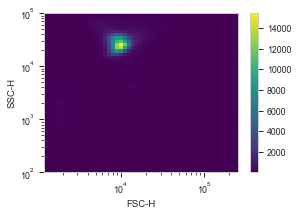

In [8]:
scatter = flow.DensityView(
    xchannel = "FSC-H",
    ychannel = "SSC-H",
    yscale = "log",
    xscale = "log")

scatter.plot(exp, ylim=(100,100000))

Gate FSC-A / SSC-A w/ Guassian w/ 2 sigma stddeviation

In [9]:
g2 = flow.PolygonOp(name = "Debris_Filter",
                    xchannel = "FSC-H",
                    ychannel = "SSC-H",
                    xscale = 'log',
                    yscale = 'log')

g2.vertices = [(4000, 10000), # bottom left
             (18000, 18000), # bottom right
             (18000, 55000), # top right
             (4000, 35000)] # top left

In [10]:
# for polygon gating as opposed to using Gaussian mixture model
exp_gated = g2.apply(exp)

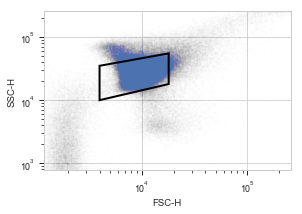

In [11]:
# takes a minute or two to run
g2.default_view().plot(exp_gated, alpha = 0.002)

In [12]:
exp_gated.data.head(10)
# exp2_gated.data.head(10)
# exp3_gated.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num,Debris_Filter
0,5220.089844,4839.0,10227.339844,9530.0,-5.920000,40.0,10.200000,24.0,23453.669922,21219.0,51.299999,4,0.0,M9,EcN,1,A,1,AJT476-1,True
1,5279.609863,4953.0,11470.010742,10005.0,1.480000,37.0,-10.200000,33.0,34054.742188,31385.0,51.299999,4,0.0,M9,EcN,1,A,1,AJT476-1,True
2,4756.950195,4534.0,9174.270508,7615.0,-14.800000,29.0,9.180000,57.0,34449.992188,31851.0,51.400002,4,0.0,M9,EcN,1,A,1,AJT476-1,True
3,5865.510254,5587.0,10355.320312,8622.0,-13.320000,28.0,35.700001,33.0,31405.169922,28826.0,51.400002,4,0.0,M9,EcN,1,A,1,AJT476-1,True
4,-33.480000,23.0,763.929993,1850.0,-11.840000,24.0,68.339996,60.0,4026.900146,3335.0,51.500000,4,0.0,M9,EcN,1,A,1,AJT476-1,False
5,4480.740234,4155.0,11912.410156,10327.0,3.700000,23.0,29.580000,39.0,36744.300781,33295.0,51.500000,4,0.0,M9,EcN,1,A,1,AJT476-1,True
6,3209.429932,3130.0,7798.090332,7526.0,-51.060001,4.0,28.559999,52.0,20616.240234,19254.0,51.500000,4,0.0,M9,EcN,1,A,1,AJT476-1,True
7,7515.330078,6921.0,8484.600586,7429.0,-21.460001,21.0,86.699997,33.0,36819.628906,33369.0,51.599998,4,0.0,M9,EcN,1,A,1,AJT476-1,True
8,6654.149902,6330.0,9946.890625,9750.0,-1.480000,36.0,-44.879997,24.0,32098.951172,29314.0,51.599998,4,0.0,M9,EcN,1,A,1,AJT476-1,True
9,5643.240234,5055.0,15658.590820,14995.0,-7.400000,19.0,-2.040000,35.0,30006.451172,27323.0,51.700001,4,0.0,M9,EcN,1,A,1,AJT476-1,True


In [13]:
# should use Debris_Filter_2 if using Gaussian Mixture Model, otherwise Debris_Filter
exp_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'iptg']).size()
# exp2_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'iptg']).size()

Debris_Filter  parent_strain  strain_num  media  iptg
False          EcN            AJT476-1    M9     0.0      32493
                              AJT476-2    M9     0.0      34974
True           EcN            AJT476-1    M9     0.0     141939
                              AJT476-2    M9     0.0     142156
dtype: int64

In [14]:
exp_gated_df = exp_gated.data
# exp2_gated_df = exp2_gated.data

filtered  = exp_gated_df[(exp_gated_df['Debris_Filter']==True)&(exp_gated_df['strain_num']!='blank')]
#picked debris filter that looked best qualitatitvely and excluded blank wells

# filtered.head(10)
filtered.tail(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num,Debris_Filter
351551,5126.160156,4587.0,9579.540039,9543.0,17.020000,44.0,53.040001,76.0,34954.050781,32539.0,867.500000,5,0.0,M9,EcN,1,C,6,AJT476-2,True
351552,5917.589844,5647.0,9366.240234,7603.0,-15.540000,26.0,-35.700001,26.0,38855.398438,35935.0,867.500000,5,0.0,M9,EcN,1,C,6,AJT476-2,True
351553,5289.839844,4940.0,8212.049805,8672.0,5.180000,47.0,70.379997,79.0,30039.000000,28296.0,867.500000,5,0.0,M9,EcN,1,C,6,AJT476-2,True
351555,6516.510254,5811.0,9976.120117,9390.0,-1.480000,32.0,-4.080000,52.0,37386.929688,34606.0,867.500000,5,0.0,M9,EcN,1,C,6,AJT476-2,True
351556,3080.159912,3009.0,9440.500000,10293.0,16.280001,31.0,-83.639999,37.0,21992.640625,20854.0,867.500000,5,0.0,M9,EcN,1,C,6,AJT476-2,True
351557,6404.910156,5747.0,9741.490234,8942.0,-29.600000,16.0,9.180000,20.0,39031.171875,35838.0,867.599976,5,0.0,M9,EcN,1,C,6,AJT476-2,True
351558,4340.310059,4050.0,12045.919922,11691.0,-5.180000,19.0,81.599998,67.0,24004.230469,22495.0,867.599976,5,0.0,M9,EcN,1,C,6,AJT476-2,True
351559,4532.819824,4331.0,9477.629883,8615.0,-12.580000,30.0,17.340000,62.0,22810.109375,21443.0,867.599976,5,0.0,M9,EcN,1,C,6,AJT476-2,True
351560,4173.839844,3930.0,10870.400391,9590.0,-5.920000,41.0,20.400000,68.0,27518.701172,25430.0,867.599976,5,0.0,M9,EcN,1,C,6,AJT476-2,True
351561,4365.419922,4152.0,11107.400391,9684.0,-42.180000,27.0,-17.340000,47.0,30228.720703,28136.0,867.599976,5,0.0,M9,EcN,1,C,6,AJT476-2,True


# Start from here

In [15]:
## pickle allows you to save an object as binary so it can be re-opened next time without re-running
## all of the code that loaded it

pickle.dump(exp_gated_df, open("pickledata_gated.p", "wb")) # wb is for writing binary
# exp_gated_df = pickle.load(open("pickledata_gated.p", "rb")) # rb is for reading binary

# # pickle.dump(exp2_gated_df, open("pickledata2_gated.p", "wb")) # wb is for writing binary
# exp2_gated_df = pickle.load(open("pickledata2_gated.p", "rb")) # rb is for reading binary

pickle.dump(filtered, open("pickledata_filtered.p", "wb")) # wb is for writing binary
# filtered = pickle.load(open("pickledata_filtered.p", "rb")) # rb is for reading binary

## Calculating Medians

In [16]:
parent = sorted(filtered['parent_strain'].unique()) # get strain numbers in experiment
print(parent)

['EcN']


In [17]:
strains = sorted(filtered['strain_num'].unique()) # get strain numbers in experiment
print(strains)

['AJT476-1', 'AJT476-2']


In [18]:
media = sorted(filtered['media'].unique()) # get media used in experiment
print(media)

['M9']


In [19]:
data_dict = dict() # initiate dictionary

# make  nested dictionary with medians in it for each condition (media, inducer, concentration, strain)
for s in strains:
    q = filtered.query('strain_num == "{}"'.format(s))
    data_dict[s] = q['FITC-A'].median()
    
data = pd.Series(data_dict)

In [20]:
# pickle.dump(data, open("data.p", "wb")) # wb is for writing binary

In [20]:
data_dict

{'AJT476-1': 5054.5498046875, 'AJT476-2': 5095.47021484375}

In [22]:
# # controls['M9']['EcN'].loc[[~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])],'AJT206']
# print(controls['M9']['EcN'].loc[:,'AJT206'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])])
# auto = (controls['M9']['EcN'].loc[:,'AJT206'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])]).mean(axis=0)


# # print(controls['M9']['EcN'].loc[:,'AJT280'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT280'])])
# # RPUg = (controls['M9']['EcN'].loc[:,'AJT280'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT280'])]).mean(axis=0)

%store -r AJT206_auto_store # from 2020-09-22_EcN_Sensors_AllReplicates_v2
# %store -r AJT280_RPUg_store # from 2020-09-22_EcN_Sensors_AllReplicates_v2
auto = AJT206_auto_store
# RPUg = AJT280_RPUg_store

print()
print(auto)
# print(RPUg)

no stored variable # from 2020-09-22_EcN_Sensors_AllReplicates_v2

33.25156319141388


In [21]:
data['AJT476-1']

5054.5498046875

In [22]:
# AJT476_r1_au_store = data['AJT476-1']

# %store AJT476_r1_au_store


Stored 'AJT476_r1_au_store' (float64)


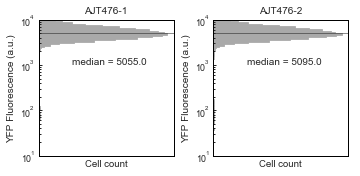

In [24]:
## Histogram-style transfer functions like in Cello SI

data_his_dict = dict() # initiate dictionary

fig_his, ax_his = plt.subplots(1,2, figsize=(5,2.5)) # row, column format
plt.tight_layout() #tidies up spacing between plots

for s in strains:
    q = filtered.query('strain_num == "{}"'.format(s))
    data_his_dict[s] = q['FITC-A']
                    
    FP = ax_his[strains.index(s)]

    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

#                 print(strains_subset.index(s), inducer_info[i]['conc'].index(c))
    logbins = np.geomspace(10,10000,100)
    FP.hist(q['FITC-A'], 
               bins = logbins, 
               orientation='horizontal',
               color = 'darkgray',
               edgecolor = 'darkgray',
               zorder=-1)
    FP.set_yscale('log')
    FP.set_ylim(10,10000)
    FP.tick_params(axis='both',which='both', 
                               bottom=False,top=False,
                               labelbottom=False,
                               right=False,left=False,
                               labelleft=False)
    FP.grid(False)
    FP.set_ylabel('YFP Fluorescence (a.u.)', size=10)
    FP.set_xlabel('Cell count')
    FP.set_title(s, size = 10)
    FP.tick_params(axis='y',which='major',left=True, length=3, width=1, labelleft=True, direction='in')
    FP.tick_params(axis='y',which='minor', left=True, length=1.5, width=1, direction='in')     
    
    xmin, xmax = FP.get_xlim()
    FP.set_xlim(xmin,xmax)
    FP.hlines(data[s],xmin,xmax, linewidth = 0.5)
    FP.text(xmax/4,data[s]/5,'median = {}'.format(round(data[s], 0)), size = 10)

                
                

In [25]:
# fig_his.savefig('RPUconstruct_RelativeExpression_plasmid.pdf', bbox_inches = "tight", transparent = True)
